Training Data Shape: (50000, 32, 32, 3)
Testing Data Shape: (10000, 32, 32, 3)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.2916 - loss: 1.8968 - val_accuracy: 0.5043 - val_loss: 1.3592
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.4754 - loss: 1.4372 - val_accuracy: 0.5585 - val_loss: 1.2298
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.5476 - loss: 1.2631 - val_accuracy: 0.5978 - val_loss: 1.1331
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5868 - loss: 1.1760 - val_accuracy: 0.6274 - val_loss: 1.0822
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6067 - loss: 1.1089 - val_accuracy: 0.6519 - val_loss: 0.9767
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6188 - loss: 1.0715 - val_accuracy: 0.6728 - val_loss: 0.9241
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.6350 - loss: 1.0294 - val_accuracy: 0.6810 - val_loss: 0.9371
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.6507 - loss: 0.9979 - 

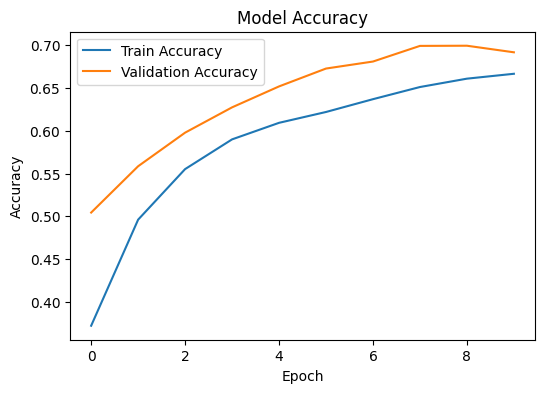

In [2]:
# ===============================
# 1. Import Required Libraries
# ===============================
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# ===============================
# 2. Load CIFAR-10 Dataset (from Keras)
# ===============================
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("Training Data Shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)

# ===============================
# 3. Data Preprocessing
# ===============================

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# ===============================
# 4. Data Augmentation
# ===============================
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Fit augmentation on training data
datagen.fit(x_train)

# ===============================
# 5. Build CNN Model
# ===============================
model = models.Sequential()

# First Convolution Block
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

# Second Convolution Block
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Third Convolution Block
model.add(layers.Conv2D(64, (3,3), activation='relu'))

# Flatten Layer
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

# Output Layer (10 classes)
model.add(layers.Dense(10, activation='softmax'))

# ===============================
# 6. Compile Model
# ===============================
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ===============================
# 7. Train Model Using Augmented Data
# ===============================
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test)
)

# ===============================
# 8. Evaluate Model
# ===============================
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)

# ===============================
# 9. Plot Accuracy Graph
# ===============================
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()